In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3)

C:\Users\AY7\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the Data for Single Linear Regression
df_simple = pd.read_csv('tvmarketing.csv')
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df_simple.shape

(200, 2)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

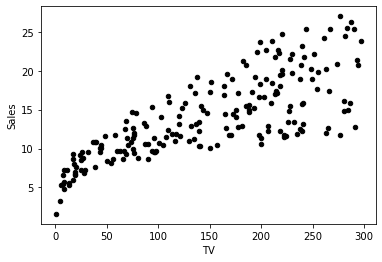

In [4]:
df_simple.plot(x='TV', y='Sales', kind='scatter', c='black')

In [5]:
df_simple_norm = (df_simple - df_simple.mean())/df_simple.std()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

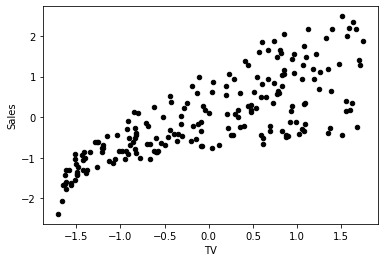

In [6]:
df_simple_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

In [7]:
X_norm = df_simple_norm['TV']
Y_norm = df_simple_norm['Sales']
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))

In [8]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

In [9]:
(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print(n_x,n_y)

1 1


In [10]:
def initialize_parameters(n_x,n_y):
    
    W = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))
    
    parameters = {'W': W, 'b': b}
    return parameters

In [11]:
parameters = initialize_parameters(1,1)
parameters

{'W': array([[0.01788628]]), 'b': array([[0.]])}

In [12]:
def forward_propegation(X,paramaters):
    W = paramaters['W']
    b = paramaters['b']
    Z = np.matmul(W,X) + b
    return Z

In [13]:
Y_predict = forward_propegation(X_norm,parameters)
print(Y_predict[0,:5])

[ 0.01730363 -0.021363   -0.0270505   0.00092865  0.00703281]


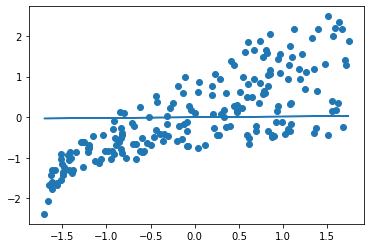

In [14]:
plt.scatter(x=X_norm, y=Y_norm)
plt.plot(X_norm[0],Y_predict[0])
plt.show()

In [15]:
def cost_function(Y,Y_predict):
    m = Y.shape[1]
    cost =  np.sum((Y-Y_predict)**2)/(2*m)
    return cost

In [16]:
cost_function(Y_norm,Y_predict)

0.48373802644758923

In [17]:
def back_propegation(Y,Y_predict,X):
    m = Y.shape[1]
    dZ= (Y_predict-Y)
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {'dW':dW, 'db':db}
    return grads

In [18]:
grads = back_propegation(Y_norm,Y_predict,X_norm)
grads

{'dW': array([[-0.76051645]]), 'db': array([[5.10702591e-16]])}

In [19]:
def update_parameters(grads,parameters,learning_rate=1.2):
    W = parameters['W']
    b = parameters['b']
    
    dW = grads['dW']
    db = grads['db']
    
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)
    parameters ={'W':W, 'b':b}
    return parameters

In [20]:
parameters = update_parameters(grads, parameters)
parameters

{'W': array([[0.93050602]]), 'b': array([[-6.1284311e-16]])}

In [36]:
def linear_regression(X,Y,learning_rate = 1.2, number_of_iteration = 100):
    n_x,n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x,n_y)
    print('init para',parameters)
    for i in range(number_of_iteration):
        Y_predict = forward_propegation(X,parameters)
        print('cost in iteration #', i+1, '=', cost_function(Y, Y_predict))
        grads = back_propegation(Y,Y_predict,X)
        parameters = update_parameters(grads, parameters,learning_rate)
    return parameters

In [22]:
paramaters = linear_regression(X_norm,Y_norm,1.2, 30)

cost in iteration # 1 = 0.494112065172974
cost in iteration # 2 = 0.20442134727030178
cost in iteration # 3 = 0.193518547411317
cost in iteration # 4 = 0.19310820963582423
cost in iteration # 5 = 0.19309276616330578
cost in iteration # 6 = 0.19309218493277405
cost in iteration # 7 = 0.19309216305758178
cost in iteration # 8 = 0.19309216223428705
cost in iteration # 9 = 0.19309216220330153
cost in iteration # 10 = 0.19309216220213535
cost in iteration # 11 = 0.19309216220209147
cost in iteration # 12 = 0.1930921622020898
cost in iteration # 13 = 0.19309216220208975
cost in iteration # 14 = 0.19309216220208975
cost in iteration # 15 = 0.19309216220208975
cost in iteration # 16 = 0.19309216220208975
cost in iteration # 17 = 0.19309216220208975
cost in iteration # 18 = 0.19309216220208975
cost in iteration # 19 = 0.19309216220208975
cost in iteration # 20 = 0.19309216220208975
cost in iteration # 21 = 0.19309216220208975
cost in iteration # 22 = 0.19309216220208975
cost in iteration # 23 =

In [23]:
print(paramaters)

{'W': array([[0.78222442]]), 'b': array([[-5.80868686e-16]])}


# Multiple Linear Regression:

In [39]:
df_house = pd.read_csv('houseprice.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


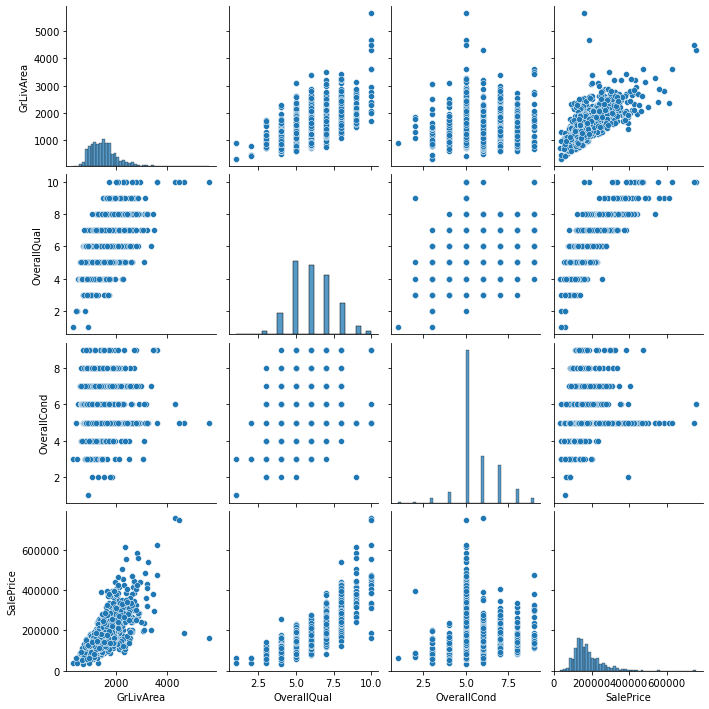

In [41]:
sns.pairplot(df_house[['GrLivArea', 'OverallQual','OverallCond','SalePrice']])

In [42]:
df_house0 = df_house[['GrLivArea', 'OverallQual','SalePrice']]
X_house = df_house0[['GrLivArea', 'OverallQual']]
Y_house = df_house0['SalePrice']

In [43]:
print('X shape:',X_house.shape)
print('Y shape:', Y_house.shape)

X shape: (1460, 2)
Y shape: (1460,)


In [44]:
X_house_norm = (X_house - X_house.mean()) / X_house.std()
Y_house_norm = (Y_house - Y_house.mean()) / Y_house.std()

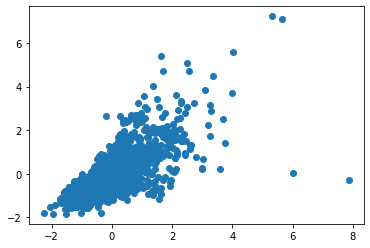

In [45]:
plt.scatter(x=X_house_norm['GrLivArea'], y=Y_house_norm)
plt.show()

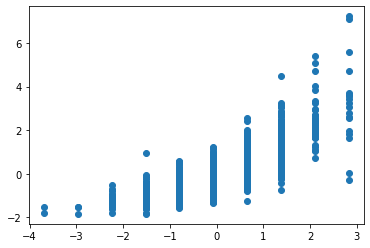

In [46]:
plt.scatter(x=X_house_norm['OverallQual'], y=Y_house_norm)
plt.show()

In [47]:
X_house_norm = np.array(X_house_norm).T
Y_house_norm = np.array(Y_house_norm).reshape((1,Y_house_norm.shape[0]))

In [48]:
print('X shape:',X_house_norm.shape)
print('Y shape:', Y_house_norm.shape)

X shape: (2, 1460)
Y shape: (1, 1460)


In [49]:
print(linear_regression(X_house_norm,Y_house_norm,1.2, 100))

init para {'W': array([[-0.00082741, -0.00627001]]), 'b': array([[0.]])}
cost in iteration # 1 = 0.5052225815991552
cost in iteration # 2 = 0.44063498053984335
cost in iteration # 3 = 0.38895029920982244
cost in iteration # 4 = 0.3466030961677919
cost in iteration # 5 = 0.31163836438654674
cost in iteration # 6 = 0.2826980460268086
cost in iteration # 7 = 0.2587254461270528
cost in iteration # 8 = 0.23886293240699683
cost in iteration # 9 = 0.22240454760147496
cost in iteration # 10 = 0.20876653943297024
cost in iteration # 11 = 0.1974655082096149
cost in iteration # 12 = 0.1881009719182724
cost in iteration # 13 = 0.18034109524980427
cost in iteration # 14 = 0.17391091024888425
cost in iteration # 15 = 0.16858256752558887
cost in iteration # 16 = 0.16416726114246133
cost in iteration # 17 = 0.16050853804190132
cost in iteration # 18 = 0.15747675415237267
cost in iteration # 19 = 0.1549644805237418
cost in iteration # 20 = 0.15288269665765686
cost in iteration # 21 = 0.1511576361323857